# Modelos de Regresión Lineal
## Modelo con datos simulados

* y = a + b * x
* x: 100 valores distribuidos según una N(1.5,2.5)
* Ye = 5 + 1.9 * x + e
* e: estará distribuida según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res =  0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x  + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list 
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,1.896139,7.434697,8.602664
1,-0.943266,4.382299,3.207794
2,4.495870,15.936925,13.542153
3,-3.116930,-1.231124,-0.922168
4,-0.906378,4.940708,3.277882


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1 )]

Text(0.5,1,'Valor actual vs Prediccion')

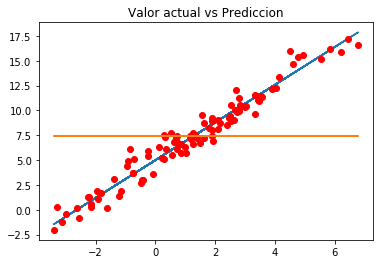

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean)
plt.title("Valor actual vs Prediccion")

In [12]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] -data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2


In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.896139,7.434697,8.602664,1.490200,1.364147,0.002785
1,-0.943266,4.382299,3.207794,17.423380,1.379462,8.997764
2,4.495870,15.936925,13.542153,37.948397,5.734932,73.188004
3,-3.116930,-1.231124,-0.922168,68.957976,0.095454,74.184641
4,-0.906378,4.940708,3.277882,16.843175,2.764990,5.959545


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])


In [15]:
SSR


1896.883183691247

In [16]:
R2 = SSR/SST

In [17]:
R2

0.9831711992390983

(array([  2.,   2.,   6.,   6.,  13.,  15.,  23.,  15.,  14.,   4.]),
 array([-2.79001834, -2.33249516, -1.87497199, -1.41744882, -0.95992564,
        -0.50240247, -0.0448793 ,  0.41264388,  0.87016705,  1.32769022,
         1.7852134 ]),
 <a list of 10 Patch objects>)

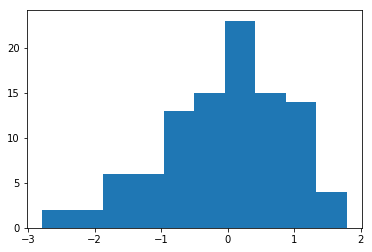

In [18]:
plt.hist(data["y_prediccion"] - data["y_actual"])

# Obteniendo la recta de regresión
* y = a + b *x
* b = sum((xi - x_m)*(y_1-y_m))/sum((xi-x_m)^2)
a = y_m - b*x_m

In [19]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean 

(1.2336906579891729, 7.381926170283139)

In [20]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] -y_mean)
data["beta_d"] =(data["x"] - x_mean)**2

In [21]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [22]:
alpha = y_mean - beta * x_mean

In [23]:
alpha, beta

(5.073083515163952, 1.871492371420267)

# El modelo lineal obtenido por regresion es y = 4.905542928818914 + 1.9388175692900693 * x

In [24]:
data["y_model"] = alpha + beta * data["x"]

In [25]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.896139,7.434697,8.602664,1.490200,1.364147,0.002785,0.034958,0.438838,8.621693
1,-0.943266,4.382299,3.207794,17.423380,1.379462,8.997764,6.530060,4.739142,3.307768
2,4.495870,15.936925,13.542153,37.948397,5.734932,73.188004,27.907941,10.641815,13.487070
3,-3.116930,-1.231124,-0.922168,68.957976,0.095454,74.184641,37.472119,18.927904,-0.760228
4,-0.906378,4.940708,3.277882,16.843175,2.764990,5.959545,5.224373,4.579893,3.376805


In [26]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_prediccion"] -data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)


In [27]:
SSR, SSD , SST

(1840.2490179344761, 89.6735852385352, 1929.35186177066)

In [28]:
R2 = SSR / SST
R2

0.9538172141630973

Text(0.5,1,'Valor actual vs Prediccion')

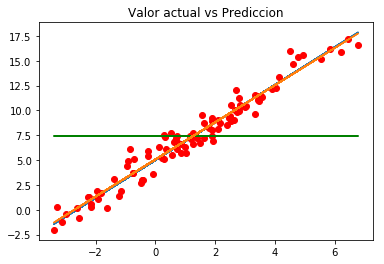

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1 )]

%matplotlib inline
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs Prediccion")

# Error estándar de los residuos(RSE)

In [30]:
RSE = np.sqrt( SSD / (len(data) - 2))
RSE

0.9565754460923015

In [31]:
np.mean(data["y_actual"])

7.381926170283139

In [33]:
RSE / np.mean(data["y_actual"])

0.1295834480088835